In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import regularizers

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks (1)/pos-maua/2020/sales_train.csv')

In [0]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [0]:
df['shop_id'].unique()

array([59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 26,  4,  6,  2,  3,  7,
        0,  1, 16, 15,  8, 10, 14, 13, 12, 53, 31, 30, 32, 35, 56, 54, 47,
       50, 42, 43, 52, 51, 41, 38, 44, 37, 46, 45,  5, 57, 58, 55, 17,  9,
       49, 39, 40, 48, 34, 33, 20, 11, 36])

In [0]:
df.groupby(by ='shop_id').count()

,date,date_block_num,item_id,item_price,item_cnt_day
shop_id,,,,,
0,9857,9857,9857,9857,9857
1,5678,5678,5678,5678,5678
2,25991,25991,25991,25991,25991
3,25532,25532,25532,25532,25532
4,38242,38242,38242,38242,38242
5,38179,38179,38179,38179,38179
6,82663,82663,82663,82663,82663
7,58076,58076,58076,58076,58076
8,3412,3412,3412,3412,3412


In [0]:
df.groupby(by ='item_id').count().sort_values(by='item_price', ascending=False)

,date,date_block_num,shop_id,item_price,item_cnt_day
item_id,,,,,
20949,31340,31340,31340,31340,31340
5822,9408,9408,9408,9408,9408
17717,9067,9067,9067,9067,9067
2808,7479,7479,7479,7479,7479
4181,6853,6853,6853,6853,6853
...,...,...,...,...,...
10752,1,1,1,1,1
10753,1,1,1,1,1
10799,1,1,1,1,1


In [0]:
item_selecionado = 20949
df_i_20949 = df[ df['item_id'] == item_selecionado ]
df_i_20949.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
352379,30.04.2013,3,22,20949,5.000000,12.0
352399,29.04.2013,3,22,20949,4.923077,13.0
352400,28.04.2013,3,22,20949,5.000000,4.0
352401,27.04.2013,3,22,20949,5.000000,4.0
352455,24.04.2013,3,22,20949,5.000000,2.0


In [0]:
df_i_20949.groupby(by ='shop_id').count().sort_values(by='item_price', ascending=False).head()

,date,date_block_num,item_id,item_price,item_cnt_day
shop_id,,,,,
28,867,867,867,867,867
31,863,863,863,863,863
53,863,863,863,863,863
22,848,848,848,848,848
42,834,834,834,834,834


In [0]:
df_i_20949.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [0]:
shop_selecionado = 28
df_i_20949_s_28 = df_i_20949[ df_i_20949['shop_id'] == shop_selecionado ][['date', 'date_block_num', 'item_price', 'item_cnt_day']]
df_i_20949_s_28.head()

,date,date_block_num,item_price,item_cnt_day
359513,29.04.2013,3,5.0,2.0
359534,30.04.2013,3,5.0,5.0
449927,31.05.2013,4,5.0,18.0
449973,30.05.2013,4,5.0,9.0
449974,28.05.2013,4,5.0,15.0


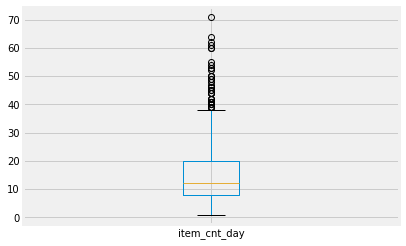

In [0]:
df_i_20949_s_28.item_cnt_day.plot.box()

In [0]:
df_i_20949_s_28.item_cnt_day.describe()

count    867.000000
mean      15.522491
std       11.131189
min        1.000000
25%        8.000000
50%       12.000000
75%       20.000000
max       71.000000
Name: item_cnt_day, dtype: float64

In [0]:
df_i_20949_s_28.quantile(.9, axis=0)

date_block_num    31.0
item_price         5.0
item_cnt_day      31.0
Name: 0.9, dtype: float64

In [0]:
amostras_perdidas = df_i_20949_s_28[ df_i_20949_s_28['item_cnt_day'] > 31 ].count()
amostras_perdidas

date              81
date_block_num    81
item_price        81
item_cnt_day      81
dtype: int64

In [0]:
df_i_20949_s_28 = df_i_20949_s_28[ df_i_20949_s_28['item_cnt_day'] <= 31 ]

In [0]:
df_i_20949_s_28.describe()

,date_block_num,item_price,item_cnt_day
count,786.000000,786.000000,786.000000
mean,18.586514,4.999321,12.835878
std,8.793789,0.019023,7.209321
min,3.000000,4.466667,1.000000
25%,11.000000,5.000000,7.000000
50%,18.000000,5.000000,11.000000
75%,27.000000,5.000000,17.000000
max,33.000000,5.000000,31.000000


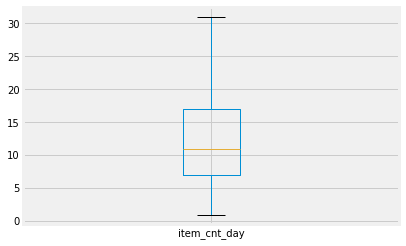

In [0]:
df_i_20949_s_28.item_cnt_day.plot.box()

In [0]:
df_i_20949_s_28.head()

,date,date_block_num,item_price,item_cnt_day
359513,29.04.2013,3,5.0,2.0
359534,30.04.2013,3,5.0,5.0
449927,31.05.2013,4,5.0,18.0
449973,30.05.2013,4,5.0,9.0
449974,28.05.2013,4,5.0,15.0


In [0]:
df_i_20949_s_28['date']  = pd.to_datetime(df_i_20949_s_28['date'])
df_i_20949_s_28 = df_i_20949_s_28.sort_values( by='date' )

In [0]:
df_i_20949_s_28.set_index( 'date', drop=True, inplace=True )
df_i_20949_s_28.head()

,date_block_num,item_price,item_cnt_day
date,,,
2013-01-07,6,5.0,19.0
2013-01-08,7,5.0,16.0
2013-01-09,8,5.0,29.0
2013-01-10,9,5.0,4.0
2013-01-11,10,5.0,13.0


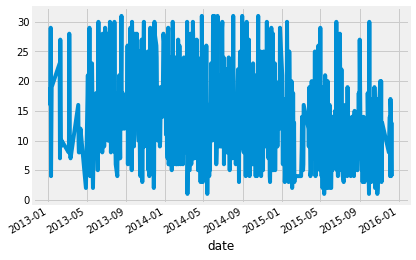

In [0]:
df_i_20949_s_28.item_cnt_day.plot.line()

In [0]:
df_all = df_i_20949_s_28[ df_i_20949_s_28['date_block_num'] > 3 ]
df_block = df_all.groupby( by='date_block_num' ).sum()

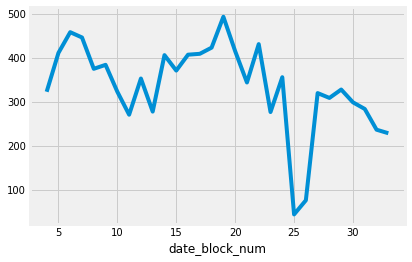

In [0]:
df_block.item_cnt_day.plot.line()

Data Preparation

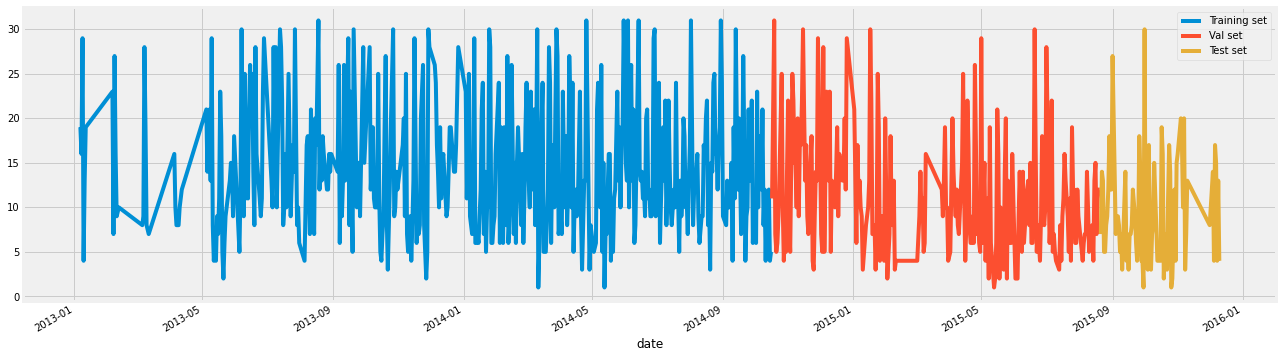

In [0]:
size = df_all['item_cnt_day'].count()

# % split data
p_train = 0.6
p_validation = 0.3

# Indexes
i_train = int( p_train * size )
i_validation = i_train + int( 0.3 * size)


df_all_train = df_all['item_cnt_day'].iloc[ 0 : i_train ]
df_all_val = df_all['item_cnt_day'].iloc[ i_train : i_validation]
df_all_test = df_all['item_cnt_day'].iloc[ i_validation : ]

# Plot do Grafico
df_all_train.plot( figsize=(20, 6), legend=True)
df_all_val.plot(legend=True)
df_all_test.plot(legend=True)
plt.legend( ['Training set', 'Val set', 'Test set'] )

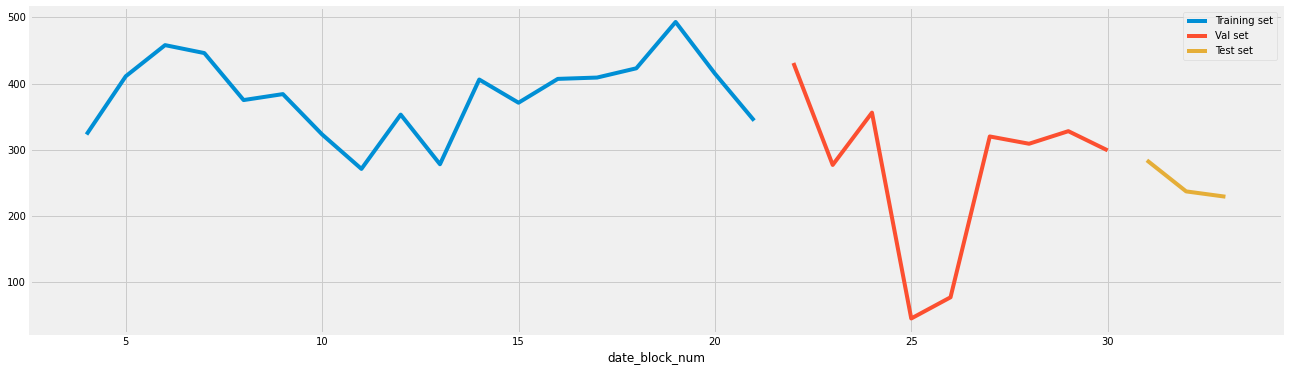

In [0]:
size = df_block['item_cnt_day'].count()

# % split data
p_train = 0.6
p_validation = 0.3

# Indexes
i_train = int( p_train * size )
i_validation = i_train + int( 0.3 * size)

df_block_train = df_block['item_cnt_day'].iloc[ : i_train ]
df_block_val = df_block['item_cnt_day'].iloc[ i_train : i_validation]
df_block_test = df_block['item_cnt_day'].iloc[ i_validation : ]

plt.close()
df_block_train.plot( figsize=(20, 6), legend=True)
df_block_val.plot(legend=True)
df_block_test.plot(legend=True)
plt.legend( ['Training set', 'Val set', 'Test set'] )

In [0]:
# Transformando em array
training_set = df_all_train.values
validation_set = df_all_val.values
test_set = df_all_test.values

# Normalização de dados

sc = MinMaxScaler(feature_range=(0,1))

training_set = training_set.reshape(-1,1)
validation_set = validation_set.reshape(-1,1)
test_set = test_set.reshape(-1,1)

training_set_norm = sc.fit_transform(training_set)
validation_set_norm = sc.transform(validation_set)
test_set_norm = sc.transform(test_set)

In [0]:
# Definição
time_steps = 14
n_samples = training_set_norm.shape[0]
future_steps = 4 # previsão de uma semana

x_train = []
y_train = []

# Cada loop pega uma amostra
# Loop para os dados de treinamento

for i in range (time_steps, n_samples - future_steps):
    x_train.append(training_set_norm[i - time_steps : i , 0])
    y_train.append(training_set_norm[i : i + future_steps , 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Loop para os dados de validação

val_set_norm = np.concatenate((training_set_norm[-time_steps:], validation_set_norm))
n_samples = validation_set_norm.size

x_val = []
y_val = []
 
for i in range(time_steps, n_samples - future_steps):
  x_val.append(validation_set_norm[i - time_steps:i , 0])
  y_val.append(validation_set_norm[i : i + future_steps, 0])
 
x_val, y_val = np.array(x_val), np.array(y_val)

# Loop para os dados de teste

test_set_norm = np.concatenate((validation_set_norm[-time_steps:], test_set_norm))
n_samples = test_set_norm.size

x_test = []
y_test = []
 
for i in range(time_steps, n_samples - future_steps):
  x_test.append(test_set_norm[i - time_steps:i , 0])
  y_test.append(test_set_norm[i : i + future_steps, 0 ])
 
x_test, y_test = np.array(x_test), np.array(y_test)

print('Dimensão dos dados de entrada do treinamento:', x_train.shape)
print('Dimensão dos dados de saída do treinamento:',y_train.shape)

print('Dimensão dos dados de entrada da validação:', x_val.shape)
print('Dimensão dos dados de saída da validação:', y_val.shape)

print('Dimensão dos dados de entrada do teste:', x_test.shape)
print('Dimensão dos dados de saída do teste:', y_test.shape)

Dimensão dos dados de entrada do treinamento: (452, 14)
Dimensão dos dados de saída do treinamento: (452, 4)
Dimensão dos dados de entrada da validação: (217, 14)
Dimensão dos dados de saída da validação: (217, 4)
Dimensão dos dados de entrada do teste: (75, 14)
Dimensão dos dados de saída do teste: (75, 4)


In [0]:
# Reshaping os valores de x   
n_features = 1

# A rede recorrente sempre vai possui uma entrada 3D, independente do número de features
X_train_3D = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_features)) # (n_samples  ,   time_steps  ,   n_features)
print(X_train_3D.shape)

X_val_3D = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], n_features))
print(X_val_3D.shape)

X_test_3D = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_features))
print(X_test_3D.shape)

(452, 14, 1)
(217, 14, 1)
(75, 14, 1)


In [0]:
# The LSTM architecture
regressor = Sequential()

# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=20, input_shape=(time_steps, n_features))) # Só tenho return_sequences=True quando a próxima camada é um LSTM
regressor.add(Dropout(0.4))

# Second LSTM layer

# regressor.add(LSTM(units=5))
# regressor.add(Dropout(0.25))

# The output layer

regressor.add(Dense(units = future_steps)) # padrão é sigmoid

# Compiling the RNN

regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse','mae'])

# Fitting to the training set

historico = regressor.fit(X_train_3D, y_train, epochs=500, batch_size= time_steps, validation_data=(X_val_3D, y_val), shuffle=False)

Epoch 1/500
33/33 [==============================] - 1s 24ms/step - loss: 0.2488 - mse: 0.2488 - mae: 0.4268 - val_loss: 0.0967 - val_mse: 0.0967 - val_mae: 0.2348
Epoch 2/500
33/33 [==============================] - 0s 7ms/step - loss: 0.1162 - mse: 0.1162 - mae: 0.2699 - val_loss: 0.0470 - val_mse: 0.0470 - val_mae: 0.1732
Epoch 3/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0859 - mse: 0.0859 - mae: 0.2308 - val_loss: 0.0473 - val_mse: 0.0473 - val_mae: 0.1741
Epoch 4/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0806 - mse: 0.0806 - mae: 0.2255 - val_loss: 0.0471 - val_mse: 0.0471 - val_mae: 0.1751
Epoch 5/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0768 - mse: 0.0768 - mae: 0.2211 - val_loss: 0.0471 - val_mse: 0.0471 - val_mae: 0.1754
Epoch 6/500
33/33 [==============================] - 0s 8ms/step - loss: 0.0751 - mse: 0.0751 - mae: 0.2187 - val_loss: 0.0473 - val_mse: 0.0473 - val_mae: 0.1769
Epoch 7/500
33/33 [==

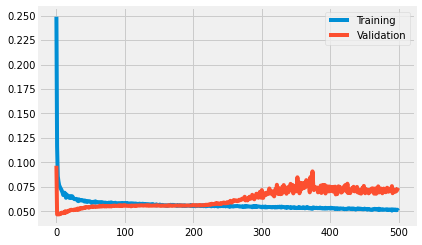

In [0]:
plt.plot(historico.history['loss'], label='Training')
plt.plot(historico.history['val_loss'], label='Validation')
plt.legend()

In [0]:
y_predict = regressor.predict(X_test_3D)

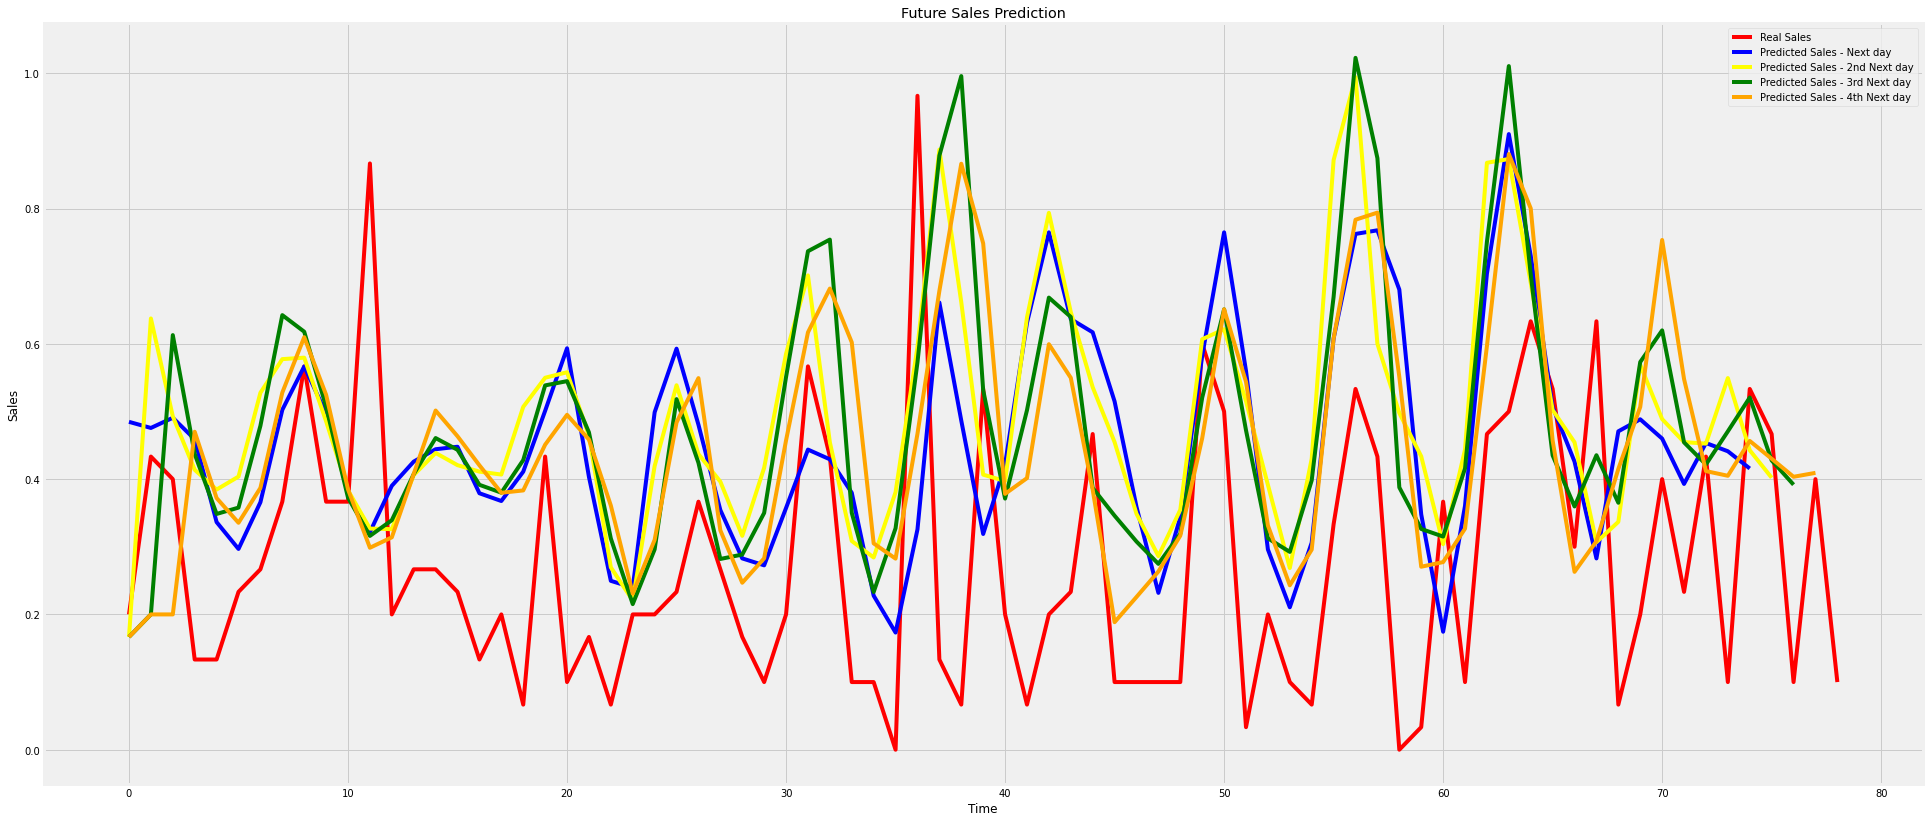

In [0]:
plt.figure(figsize=(30,14))
plt.plot(test_set_norm[time_steps:], color='red',label='Real Sales')
plt.plot(y_predict[:, 0], color='blue',label='Predicted Sales - Next day')


plt.plot(np.concatenate(([0],y_predict[:, 1])), color='yellow',label='Predicted Sales - 2nd Next day')
plt.plot(np.concatenate(([0, 0],y_predict[:, 2])), color='green',label='Predicted Sales - 3rd Next day')
plt.plot(np.concatenate(([0, 0, 0],y_predict[:, 3])), color='orange',label='Predicted Sales - 4th Next day')
#plt.plot(sc.inverse_transform(y_predict)[:, 4], color='purple',label='Predicted Sales - 5th Next day')
#plt.plot(sc.inverse_transform(y_predict)[:, 5], color='pink',label='Predicted Sales - 6th Next day')
#plt.plot(sc.inverse_transform(y_predict)[:, 6], color='gray',label='Predicted Sales - 7th Next day')
plt.title('Future Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Agora ficou Sério!

In [0]:
n_time_steps_list = [  5, 30, 60 ]

n_neurons = [ 5, 20, 40 ]


drop_out = [ 0.25, 0.4 ]

optimizer_list = ['adam', 'rmsprop']

batch_list = [  5, 30, 60 ]

modelos = {}

In [0]:
i = 0
for time_steps in n_time_steps_list:
  # Definição
  #time_steps = 14
  n_samples = training_set_norm.shape[0]
  future_steps = 4 # previsão de uma semana
  x_train = []
  y_train = []
  # Cada loop pega uma amostra

  # Loop para os dados de treinamento
  for i in range (time_steps, n_samples - future_steps):
      x_train.append(training_set_norm[i - time_steps : i , 0])
      y_train.append(training_set_norm[i : i + future_steps , 0])
  x_train, y_train = np.array(x_train), np.array(y_train)

  # Loop para os dados de validação
  val_set_norm = np.concatenate((training_set_norm[-time_steps:], validation_set_norm))
  n_samples = validation_set_norm.size
  x_val = []
  y_val = []
  for i in range(time_steps, n_samples - future_steps):
    x_val.append(validation_set_norm[i - time_steps:i , 0])
    y_val.append(validation_set_norm[i : i + future_steps, 0])
  x_val, y_val = np.array(x_val), np.array(y_val)

  # Loop para os dados de teste
  test_set_norm = np.concatenate((validation_set_norm[-time_steps:], test_set_norm))
  n_samples = test_set_norm.size
  x_test = []
  y_test = []
  for i in range(time_steps, n_samples - future_steps):
    x_test.append(test_set_norm[i - time_steps:i , 0])
    y_test.append(test_set_norm[i : i + future_steps, 0 ])
  x_test, y_test = np.array(x_test), np.array(y_test)

  # Reshaping os valores de x   
  n_features = 1
  # A rede recorrente sempre vai possui uma entrada 3D, independente do número de features
  X_train_3D = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_features)) # (n_samples  ,   time_steps  ,   n_features)
  X_val_3D = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], n_features))
  X_test_3D = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_features))

  for n_n in n_neurons:
    for drop in drop_out:
      for batch in batch_list:
        for op in optimizer_list:

          modelos[i] = {'time_steps': time_steps, 'neurons': n_n , 'drop_out':drop, 'batch_size':batch, 'op': op, 'camadas': 1 }
          modelos[i]['resumo'] = "'time_steps': {}, 'neurons': {} , 'drop_out':{}, 'batch_size':{}, 'op': {}, 'camadas': {}".format(time_steps,n_n,drop,batch,op, 1)
          
          # The LSTM architecture
          modelos[i]['model'] = Sequential()
          modelos[i]['model'].add(LSTM(units=n_n, input_shape=(time_steps, n_features)))
          modelos[i]['model'].add(Dropout(drop))
          # The output layer
          modelos[i]['model'].add(Dense(units = future_steps))

          modelos[i]['model'].compile(optimizer=op, loss='mean_squared_error', metrics=['mse'])

          hist1 = modelos[i]['model'].fit(X_train_3D, y_train, epochs=300, batch_size= batch, validation_data=(X_val_3D, y_val), shuffle=False)
          modelos[i]['history'] = hist1.history['loss'][-1]
          modelos[i]['loss'] = hist1.history['loss'][-1]
          modelos[i]['val_loss'] = hist1.history['val_loss'][-1]
          
          
          
          i=i+1
          modelos[i] = {'time_steps': time_steps, 'neurons': n_n , 'drop_out':drop, 'batch_size':batch, 'op': op, 'camadas': 2 }
          modelos[i]['resumo'] = "'time_steps': {}, 'neurons': {} , 'drop_out':{}, 'batch_size':{}, 'op': {}, 'camadas': {}".format(time_steps,n_n,drop,batch,op, 2)
          
          # The LSTM architecture
          modelos[i]['model'] = Sequential()
          modelos[i]['model'].add(LSTM(units=n_n,return_sequences=True, input_shape=(time_steps, n_features)))
          modelos[i]['model'].add(Dropout(drop))
          modelos[i]['model'].add(LSTM(units=n_n, input_shape=(time_steps, n_features)))
          modelos[i]['model'].add(Dropout(drop))
          # The output layer
          modelos[i]['model'].add(Dense(units = future_steps))

          modelos[i]['model'].compile(optimizer=op, loss='mean_squared_error', metrics=['mse'])

          hist2 = modelos[i]['model'].fit(X_train_3D, y_train, epochs=300, batch_size= batch, validation_data=(X_val_3D, y_val), shuffle=False)
          modelos[i]['history'] = hist2.history['loss'][-1]
          modelos[i]['loss'] = hist2.history['loss'][-1]
          modelos[i]['val_loss'] = hist2.history['val_loss'][-1]
          i= i+1

          print('=============== i:{} ============'.format(i))


Streaming output truncated to the last 5000 lines.
Epoch 42/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0534 - val_mse: 0.0534
Epoch 43/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0609 - mse: 0.0609 - val_loss: 0.0537 - val_mse: 0.0537
Epoch 44/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0546 - val_mse: 0.0546
Epoch 45/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0541 - val_mse: 0.0541
Epoch 46/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0536 - val_mse: 0.0536
Epoch 47/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0535 - val_mse: 0.0535
Epoch 48/300
16/16 [==============================] - 0s 7ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0543 - val_mse: 0.0543
Epoch 49/300
16/16 [=====

In [0]:
for n_layers in n_neurons:
  print(n_layers)
  for n_n in n_neurons[n_layers]:
    print(n_n)

In [0]:
historico.history.keys()

In [0]:
historico.history['val_loss'][-1]

In [0]:
historico.history['loss'][-1]